#📌 Extracción

In [2]:
import pandas as pd
import requests

Datos cargados correctamente


In [3]:
# URL directa al archivo JSON en GitHub sin vista previa
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Obtener la respuesta desde la URL
response = requests.get(url)

# Verificamos que la respuesta sea válida
if response.status_code == 200:
    data_json = response.json()
    print("Datos cargados correctamente")
else:
    print("Error al cargar los datos. Código:", response.status_code)

Datos cargados correctamente


In [4]:
# Convertir el JSON en un DataFrame
df = pd.DataFrame(data_json)

# Vista previa de los primeros registros
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
print(f"📊 Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.info()

📊 Filas: 7267, Columnas: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

###Explorar las columnas del dataset y verificar sus tipos de datos

In [8]:
# Expandir columnas anidadas en columnas planas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Combinar todo en un DataFrame final
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

In [9]:
# Vista general de las columnas y tipos de datos
df_final.info()

# Tipos de datos por separado (más limpio)
df_final.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


###Consultar el diccionario para comprender mejor el significado de las variables

Consulte el diccionario completo aquí:  
🔗 [TelecomX_diccionario.md](https://github.com/CSebasGC/desafio_colab_csgc_TelecomX/blob/main/TelecomX_diccionario.md)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

###Identificar las columnas mas relevantes para el analisis de evasión

Las variables que pueden tener mayor impacto en la cancelación (`Churn`) son:

- `Contract`: clientes con contrato mensual tienden a cancelar más fácil.
- `InternetService`, `OnlineSecurity`, `TechSupport`: reflejan calidad del servicio.
- `tenure`: clientes nuevos tienen más probabilidad de cancelar.
- `Charges.Monthly` y `Charges.Total`: clientes con cargos altos podrían abandonar.
- `SeniorCitizen`: posibles diferencias generacionales en comportamiento.
- `PaymentMethod` y `PaperlessBilling`: canales de pago pueden influir en la retención.

Estas variables serán clave para el análisis exploratorio en la siguiente fase.

In [14]:
# 1. Verificar valores nulos
print("Valores nulos por columna:")
print(df_final.isnull().sum())

# 2. Verificar duplicados
print("\nFilas duplicadas:")
print(df_final.duplicated().sum())

# 3. Revisar valores únicos en variables categóricas
print("\nValores únicos por columna categórica:")
for col in df_final.select_dtypes(include='object'):
    print(f"\n {col}:")
    print(df_final[col].unique())

# 4. Validar columnas numéricas convertidas desde texto
df_final['Charges.Monthly'] = pd.to_numeric(df_final['Charges.Monthly'], errors='coerce')
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Confirmar si quedaron NaNs tras la conversión
print("\nValores nulos en 'Charges.Monthly' y 'Charges.Total' tras la conversión:")
print(df_final[['Charges.Monthly', 'Charges.Total']].isnull().sum())

Valores nulos por columna:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

Filas duplicadas:
0

Valores únicos por columna categórica:

 customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

 Churn:
['No' 'Yes' '']

 gender:
['Female' 'Male']

 Partner:
['Yes' 'No']

 Dependents:
['Yes' 'No']

 PhoneService:
['Yes' 'No']

 MultipleLines:
['No' 'Yes' 'No phone service']

 InternetService:
['DSL' 'Fiber optic' 'No']

 OnlineSecurity:
['No' 'Yes' 'No internet service']

 OnlineBackup:
['Yes' 'No' 'No inte

In [15]:
# Eliminar filas con Charges.Total nulo (solo son 11 de +7000)
df_final = df_final[df_final['Charges.Total'].notnull()]

In [16]:
df_final['Churn'].value_counts(dropna=False)

,count
Churn,
No,5163
Yes,1869
,224


In [17]:
# Reemplazar valores vacíos por NaN y luego eliminar
df_final['Churn'] = df_final['Churn'].replace('', pd.NA)
df_final = df_final.dropna(subset=['Churn'])

In [19]:
# Eliminar valores nulos en 'Charges.Total'
df_final = df_final[df_final['Charges.Total'].notnull()]

# Reemplazar '' por NaN en 'Churn' y eliminar esos registros
df_final['Churn'] = df_final['Churn'].replace('', pd.NA)
df_final = df_final.dropna(subset=['Churn'])

# Confirmamos que todo esté limpio
print("Datos limpios. Nuevas dimensiones:")
print(df_final.shape)

Datos limpios. Nuevas dimensiones:
(7032, 21)


In [20]:
# Columnas de respuestas tipo sí/no y servicios
cols_str = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Limpiar espacios y pasar a minúsculas
for col in cols_str:
    df_final[col] = df_final[col].str.strip().str.lower()

In [22]:
# Revisión rápida de valores únicos por columna
for col in cols_str:
    print(f"\n {col}:")
    print(df_final[col].unique())


 Churn:
['no' 'yes']

 gender:
['female' 'male']

 Partner:
['yes' 'no']

 Dependents:
['yes' 'no']

 PhoneService:
['yes' 'no']

 MultipleLines:
['no' 'yes' 'no phone service']

 InternetService:
['dsl' 'fiber optic' 'no']

 OnlineSecurity:
['no' 'yes' 'no internet service']

 OnlineBackup:
['yes' 'no' 'no internet service']

 DeviceProtection:
['no' 'yes' 'no internet service']

 TechSupport:
['yes' 'no' 'no internet service']

 StreamingTV:
['yes' 'no' 'no internet service']

 StreamingMovies:
['no' 'yes' 'no internet service']

 Contract:
['one year' 'month-to-month' 'two year']

 PaperlessBilling:
['yes' 'no']

 PaymentMethod:
['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [24]:
# Simplificar métodos de pago (opcional)
df_final['PaymentMethod'] = df_final['PaymentMethod'].replace({
    'credit card (automatic)': 'credit_card',
    'bank transfer (automatic)': 'bank_transfer',
    'electronic check': 'e_check',
    'mailed check': 'mailed_check'
})

In [25]:
df_final['Churn'].value_counts()

,count
Churn,
no,5163
yes,1869


In [26]:
# Crear columna con valor diario estimado (suponiendo 30 días al mes)
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

# Vista previa
df_final[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [27]:
# Columnas binarias tipo sí/no
binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'
]

# Convertimos a 1 (yes) y 0 (no)
for col in binarias:
    df_final[col] = df_final[col].map({'yes': 1, 'no': 0})

In [28]:
df_final = df_final.rename(columns={
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges',
    'Cuentas_Diarias': 'DailyCharges'
})

In [29]:
# Revisamos que los cambios se hayan aplicado bien
df_final[['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].head()

,Churn,Partner,Dependents,PhoneService,PaperlessBilling
0,0,1,1,1,1
1,0,0,0,1,0
2,1,0,0,1,1
3,1,1,0,1,1
4,1,1,0,1,1


#📊 Carga y análisis

In [30]:
# Análisis descriptivo de variables numéricas
df_final.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,DailyCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [31]:
# Transpuesto para que se vea mejor
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7032.0,0.265785,0.441782,0.000000,0.00000,0.000,1.000000,1.000000
SeniorCitizen,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
Partner,7032.0,0.482509,0.499729,0.000000,0.00000,0.000,1.000000,1.000000
Dependents,7032.0,0.298493,0.457629,0.000000,0.00000,0.000,1.000000,1.000000
tenure,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
PhoneService,7032.0,0.903299,0.295571,0.000000,1.00000,1.000,1.000000,1.000000
PaperlessBilling,7032.0,0.592719,0.491363,0.000000,0.00000,1.000,1.000000,1.000000
MonthlyCharges,7032.0,64.798208,30.085974,18.250000,35.58750,70.350,89.862500,118.750000
TotalCharges,7032.0,2283.300441,2266.771362,18.800000,401.45000,1397.475,3794.737500,8684.800000
DailyCharges,7032.0,2.159940,1.002866,0.608333,1.18625,2.345,2.995417,3.958333


In [32]:
df_final.median(numeric_only=True)

,0
Churn,0.000
SeniorCitizen,0.000
Partner,0.000
Dependents,0.000
tenure,29.000
PhoneService,1.000
PaperlessBilling,1.000
MonthlyCharges,70.350
TotalCharges,1397.475
DailyCharges,2.345


In [33]:
# Conteo de casos churn vs no churn
df_final['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


<ipython-input-34-83d903d8fda0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='Churn', palette='pastel')


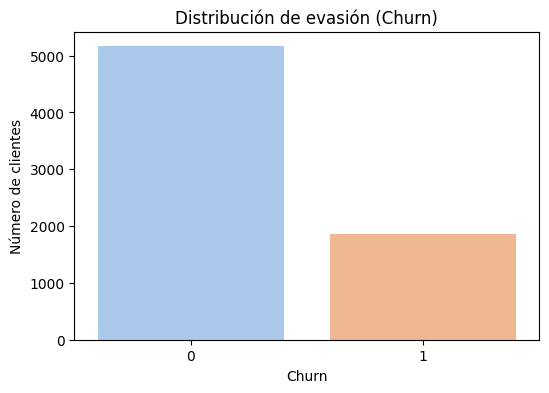

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df_final, x='Churn', palette='pastel')
plt.title('Distribución de evasión (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.show()

#📄Informe final